# Boundary value problems

---
Notes following [this book](https://websites.umich.edu/~mejn/cp/index.html).

Say we want to find the solution to a partial differential equation (PDE) given values at the boundary. One technique we can use is the finite differences method, which divides the region up into a grid of discrete points.

Suppose we want to find the electric potential $\phi$ within an empty square region that has one wall at voltage $V$ and the others at zero. 

We know that 

$$
\vec{E} = - \nabla \phi
$$

where $\vec{E}$, the electric field vector, is given by the negative gradient of the electric potential. By Gauss's Law, we also know that

$$
\nabla \cdot \vec{E} = \frac{\rho}{\epsilon_0}
$$

where $\epsilon_0$ is the permittivity of free space and $\rho$ is the electric charge density distribution. In our case, since the box is empty, it contains no charge. Thus

$$
\nabla \cdot \vec{E} = 0
$$

Then combining these equations, we get Laplace's equation

\begin{align*}
\nabla \phi &= -\vec{E} \\
\nabla \cdot \nabla \phi &= - \nabla \cdot \vec{E} \\
\nabla^2 \phi &= 0 \\
\end{align*}

In two dimensions, the Laplacian operator takes the form

$$
\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}
$$

So that

$$
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0
$$

The goal is to solve for $\phi(x,y)$ within the box given that $\phi = V$ on the top edge, and $\phi = 0$ on the other three edges. 


Before solving the pde, we need to do is find a numerical way to approximate second partial derivatives. We can start out by finding the numerical approximation for a full derivative.

---

## Numerical differentiation interlude

### First derivatives 

The definition of the derivative for a function $f(x)$ with respect to $x$ is simply

$$
\frac{df}{dx} = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
$$

The definition of a partial derivative $f(x, y)$ with respect to $x$ is
$$
\frac{\partial f}{\partial x} = \lim_{h \rightarrow 0} \frac{f(x + h, y) - f(x, y)}{h}
$$

Given a small step $h$, the *forward difference* method for approximating a full derivative uses a point $x+h$ in front of $x$:
$$
\frac{df}{dx} \approx \frac{f(x + h) - f(x)}{h}
$$

We could instead look back a small amount $h$ from $x$, using the *backward difference* method:
$$
\frac{df}{dx} \approx \frac{f(x) - f(x - h)}{h}
$$

The *central difference* method improves upon the prior methods by looking forward and backward a small amount $\frac{h}{2}$ symmetrically around $x$:
$$ 
\frac{df}{dx} \approx \frac{f(x + \frac{h}{2}) - f(x - \frac{h}{2})}{h}
$$

### Second derivatives

By taking the derivative of a first derivative, we get a second derivative. We can numerically approximate a second derivative using the *central difference* method. 

Let's first consider the *central difference* derivative at a point $x + \frac{h}{2}$:

$$ 
f'(x + h/2) \approx \frac{f(x + \frac{h}{2} + \frac{h}{2}) - f(x + \frac{h}{2} - \frac{h}{2})}{h} = \frac{f(x + h) - f(x)}{h}
$$

And next at a point $x - \frac{h}{2}$:

$$ 
f'(x - h/2) \approx \frac{f(x - \frac{h}{2} + \frac{h}{2}) - f(x - \frac{h}{2} - \frac{h}{2})}{h} = \frac{f(x) - f(x - h)}{h}
$$

We see that we have sort of recovered the forward and backward difference derivatives.

This is great! Recall that we originally formulated the *central difference* approximation of the first derivative using $f(x \pm \frac{h}{2})$. Now that we have expressions for $f'(x \pm \frac{h}{2})$, we can similarly approximate the second derivative using the *central difference* method:

$$ 
f''(x) \approx \frac{f'(x + \frac{h}{2}) - f'(x - \frac{h}{2})}{h} = \frac{\frac{f(x + h) - f(x)}{h} - \frac{f(x) - f(x - h)}{h}}{h} = \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}
$$

We can similarly write down the second partial derivative of $f(x, y)$ with respect to $x$ as

$$ 
\frac{\partial^2 f}{\partial x^2} \approx  \frac{f(x + h) - 2f(x) + f(x - h)}{h^2} = \frac{f(x + h) + f(x - h) - 2f(x)}{h^2}
$$

The proof is left as an exercise to the reader :)

---
## The method of relaxation (Jacobi method)

Returning to our original problem, we want to solve for $\phi(x,y)$ within the box given that $\phi = V$ on the top edge, and $\phi = 0$ on the other three edges. 

Let's set up a grid of points within the box, including the boundary, a distance $a$ apart (L1 distance). Recall that we applied the Laplacian operator to $\phi$ to find how the electric potential is characterized within the box
$$
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0
$$

Using what we learned above about second derivatives, we can write down the partial derivatives with respect to $x$ and $y$, respectively, as
$$ 
\frac{\partial^2 \phi}{\partial x^2} \approx  \frac{\phi(x + a, y)  + \phi(x - a, y) - 2\phi(x, y)}{a^2}
$$
$$ 
\frac{\partial^2 \phi}{\partial y^2} \approx  \frac{\phi(x, y+a)  + \phi(x, y-a) - 2\phi(x, y)}{a^2}
$$

Plugging these into Laplace's equation, we get

$$
\frac{\phi(x + a, y)  + \phi(x - a, y) - 2\phi(x, y)}{a^2} + \frac{\phi(x, y+a)  + \phi(x, y-a) - 2\phi(x, y)}{a^2}  = 0
$$

Which can be rearranged to get our solution for $\phi$

$$
\boxed{\phi(x, y) = \frac{1}{4} \left[\phi(x + a, y)  + \phi(x - a, y) + \phi(x, y+a)  + \phi(x, y-a)\right]}
$$

Interestingly, we see that the solution at $(x, y)$ is the average of the values on the immediately adjacent points of the grid.

This suggests a technique for numerically solving for $\phi$
1) Fix the known boundary conditions on $\phi$
2) Guess some initial values for the rest of $\phi(x, y)$ (we'll just use zero)
3) Assign each point in the grid a new value according to our averaging solution for $\phi(x, y)$ 
4) Repeat step 3 until convergence

Suppose that we have a 100 x 100 grid with $V = 1$, then

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
N = 100          # number of grid points on a side
V = 1.0          # voltage at top wall
target = 1e-6    # target accuracy

# phi(x, y) grid -- N+1 x N+1 to include the boundary edges as well
phi = np.zeros([N+1,N+1],float)

# set the top edge to V
phi[0,:] = V

In [51]:
def relaxation_slow(phi: np.ndarray, target: float) -> np.ndarray:
    """Relaxation function as described in the book... very slow!"""
    N = phi.shape[0] - 1
    delta = float("inf") 

    # create a copy of phi to hold the updated values
    phi_prime = phi.copy()
    
    while delta > target:
        # only iterate over the interior points -- the boundary values are fixed
        for i in range(1, N):
            for j in range(1, N):
                
                # update the value of phi_prime at each point
                phi_prime[i,j] = 0.25 * (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])
                
        # get the maximum difference between phi and phi_prime
        delta = np.max(np.abs(phi_prime - phi))
        
        # swap the values of phi and phi_prime
        phi, phi_prime = phi_prime, phi
    return phi



def relaxation(phi: np.ndarray, target: float) -> np.ndarray:
    """Vectorized relaxation function... much faster!"""
    N = phi.shape[0] - 1
    delta = float("inf")  

    # make a copy of phi to compare the new values
    phi_prime = phi.copy()
    
    while delta > target:
        # update all interior points at once using slicing
        phi[1:N, 1:N] = 0.25 * (phi[0:N-1, 1:N] + phi[2:N+1, 1:N] + phi[1:N, 0:N-1] + phi[1:N, 2:N+1])

        # get the maximum difference between phi and phi_prime
        delta = np.max(np.abs(phi - phi_prime))

    return phi

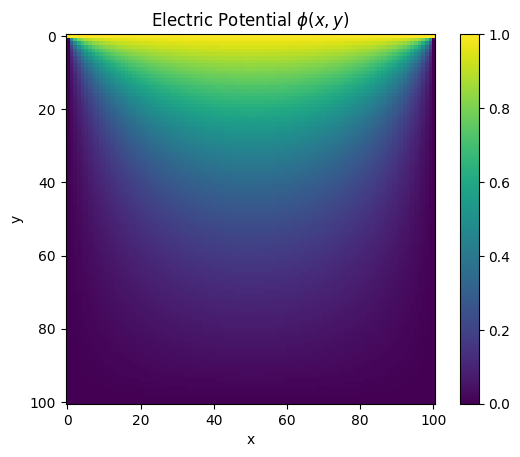

In [53]:
phi_solution = relaxation(phi, target)
plt.imshow(phi_solution)
plt.colorbar()
plt.title(r"Electric Potential $\phi(x, y)$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---

## Overrelaxation

In [ ]:
def overrelaxation():
    ...

---

## The Gauss-Seidel method

In [ ]:
def gauss_seidel():
    ...